### Importing the Basic Libraries

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [4]:
df =pd.read_csv(r'C:\Users\DELL\Downloads\Telecom_customer_churn.csv')
df.head() ### Checking the dataset 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
### Checking the datashape
df.shape

(7043, 21)

In [6]:
### Checking the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### There are no null values in the dataset but there is a column CustomerID which is unnessary in the dataset. So, I will remove this.

In [11]:
df.drop(columns='customerID',inplace=True)

In [12]:
### Cheking the duplicates
df.duplicated().sum()

22

In [13]:
### Removing the duplicates 
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

### Duplicate values removed.

### Data is cleaned and moving toward the EDA part

## EDA

In [57]:
### Importing the libraries 
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


No     5164
Yes    1857
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

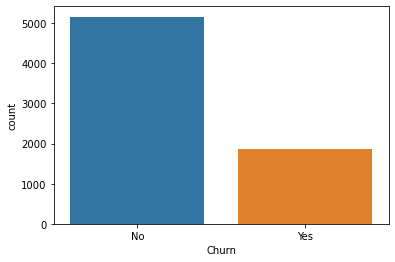

In [59]:
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df)

Male      3541
Female    3480
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

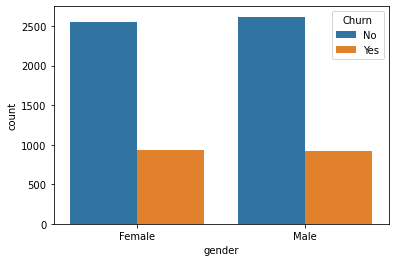

In [61]:
print(df['gender'].value_counts())
sns.countplot(x='gender', data=df, hue="Churn")

### Chrun Response is same for both gender

0    5880
1    1141
Name: SeniorCitizen, dtype: int64


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

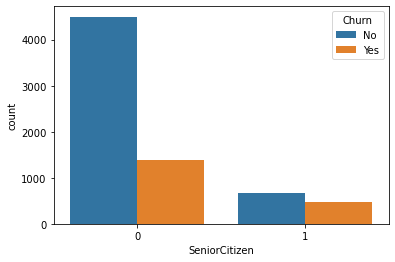

In [80]:
print(df['SeniorCitizen'].value_counts())
sns.countplot(x='SeniorCitizen', data=df, hue="Churn")

### Senior Citizen has less chrun response, while young people has strong relation with chrun response.

No     3619
Yes    3402
Name: Partner, dtype: int64


<AxesSubplot:xlabel='Partner', ylabel='count'>

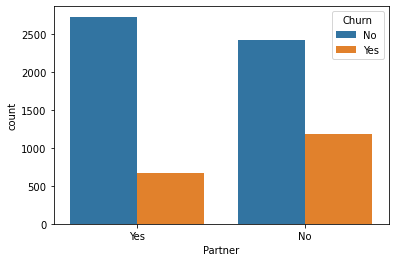

In [63]:
print(df['Partner'].value_counts())
sns.countplot(x='Partner', data=df, hue="Churn")

### Customer with partner has more churn response.

No     4911
Yes    2110
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

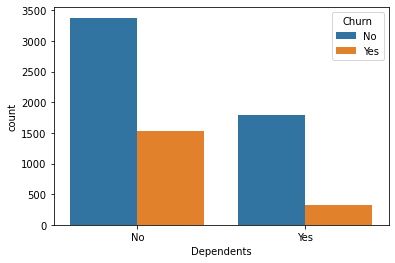

In [64]:
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, hue="Churn")

### Customer with no Dependant has more churn response.

Yes    6339
No      682
Name: PhoneService, dtype: int64


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

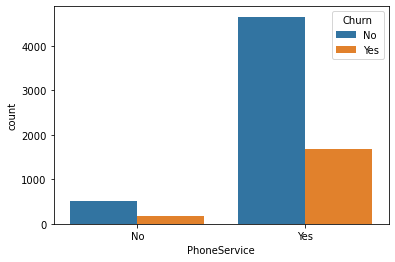

In [66]:
print(df['PhoneService'].value_counts())
sns.countplot(x='PhoneService', data=df, hue="Churn")

### Customer with phoneservice has high churn response.

No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

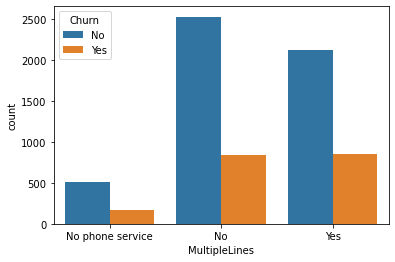

In [67]:
print(df['MultipleLines'].value_counts())
sns.countplot(x='MultipleLines', data=df, hue="Churn")

### Customer with no multiple lines and multipleline has high churn response.

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


<AxesSubplot:xlabel='InternetService', ylabel='count'>

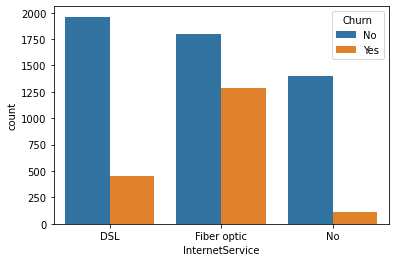

In [68]:
print(df['InternetService'].value_counts())
sns.countplot(x='InternetService', data=df, hue="Churn")

### Customer with DSL and FiberOptics internetservice has high churn response.

No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

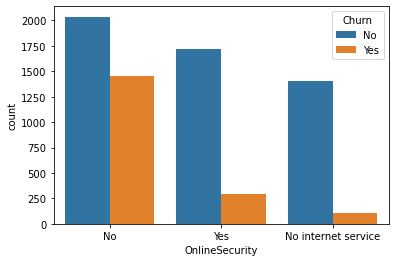

In [69]:
print(df['OnlineSecurity'].value_counts())
sns.countplot(x='OnlineSecurity', data=df, hue="Churn")

### Customer with no onlince sercutity has high churn response.

No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

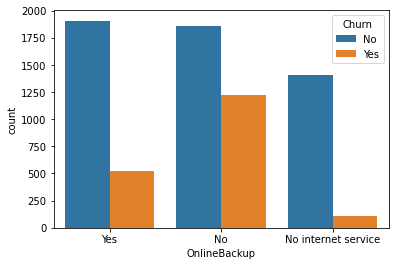

In [70]:
print(df['OnlineBackup'].value_counts())
sns.countplot(x='OnlineBackup', data=df, hue="Churn")

### Customer with no online backup has high churn response.

No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

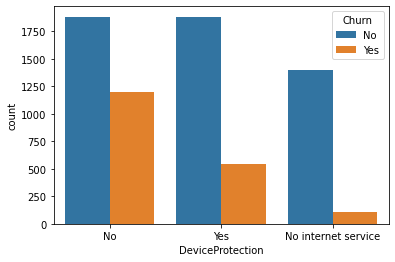

In [71]:
print(df['DeviceProtection'].value_counts())
sns.countplot(x='DeviceProtection', data=df, hue="Churn")

### Customer with no Device Protection has high churn response.

In [72]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

No                     3465
Yes                    2044
No internet service    1512
Name: TechSupport, dtype: int64


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

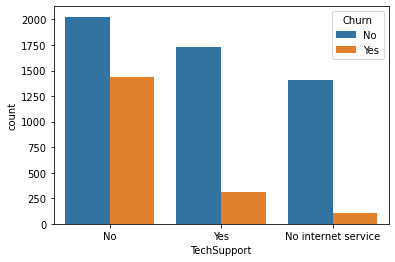

In [73]:
print(df['TechSupport'].value_counts())
sns.countplot(x='TechSupport', data=df, hue="Churn")

### Customer with No Tech Support has high churn response.

No                     2802
Yes                    2707
No internet service    1512
Name: StreamingTV, dtype: int64


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

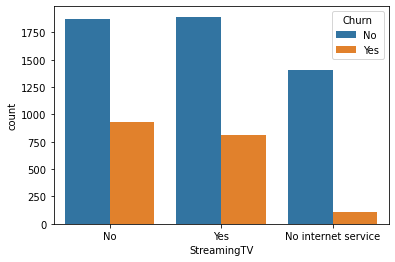

In [74]:
print(df['StreamingTV'].value_counts())
sns.countplot(x='StreamingTV', data=df, hue="Churn")

### Customer with StreamingTV and without StreamingTV has almost same churn response.

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

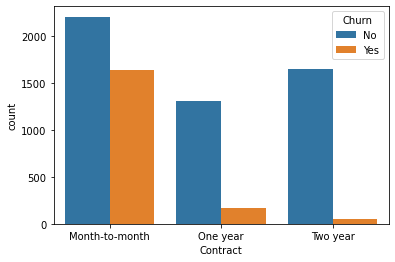

In [75]:
print(df['Contract'].value_counts())
sns.countplot(x='Contract', data=df, hue="Churn")

### Customer with Month to Month contract has more churn response.

Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

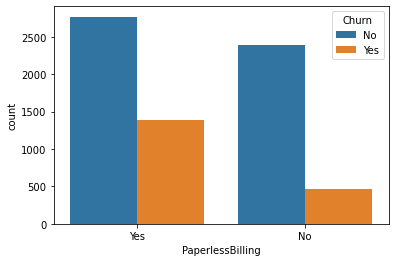

In [76]:
print(df['PaperlessBilling'].value_counts())
sns.countplot(x='PaperlessBilling', data=df, hue="Churn")

### Customer with PaperlessBilling has more churn response.

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

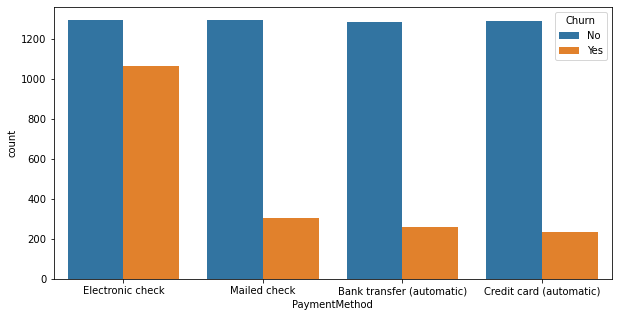

In [79]:
print(df['PaymentMethod'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod', data=df, hue="Churn")

### Customer with Electonic Payment Method has more churn response and rest payment method has almost same churn response.

### Most of the column has categorical values, some column has continuous values. So, I will plot scatter plot but before that i will chnage the categorical values into integers.

In [84]:
### Importing the Label endoder.
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
col=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','TotalCharges', 'Churn']
df[col]= df[col].apply(le.fit_transform)

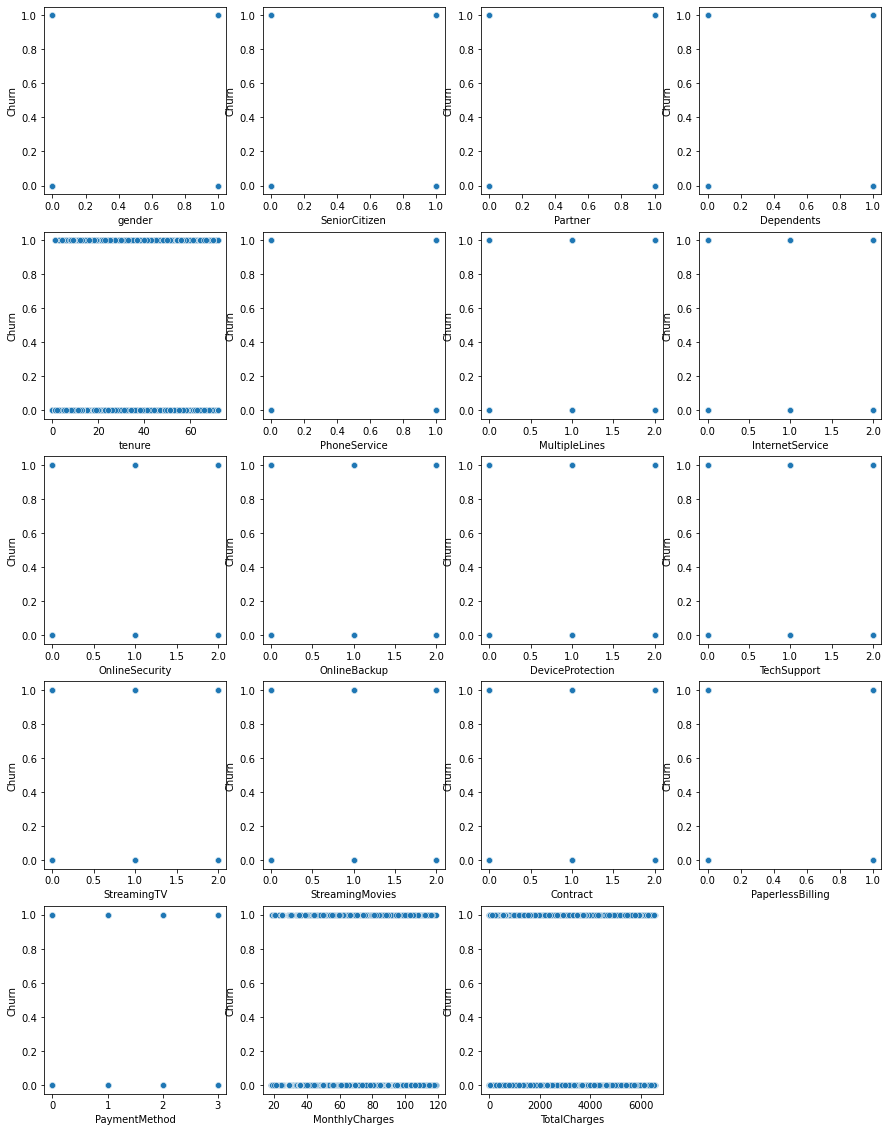

In [86]:
#### Plotting scatterplot to check the trend between features and target
x=df.drop(columns='Churn')
y=df['Churn']
plt.figure(figsize=(15,20))
pn=1
for column in x:
    if pn <= 20:
        plt.subplot(5,4, pn)
        sns.scatterplot(x[column],y )
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

### All the features are categorical values but there are three column which has continuous data and their trend with churn response is good. Now going forward to check multicolinearity but before that I will check the stats of the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

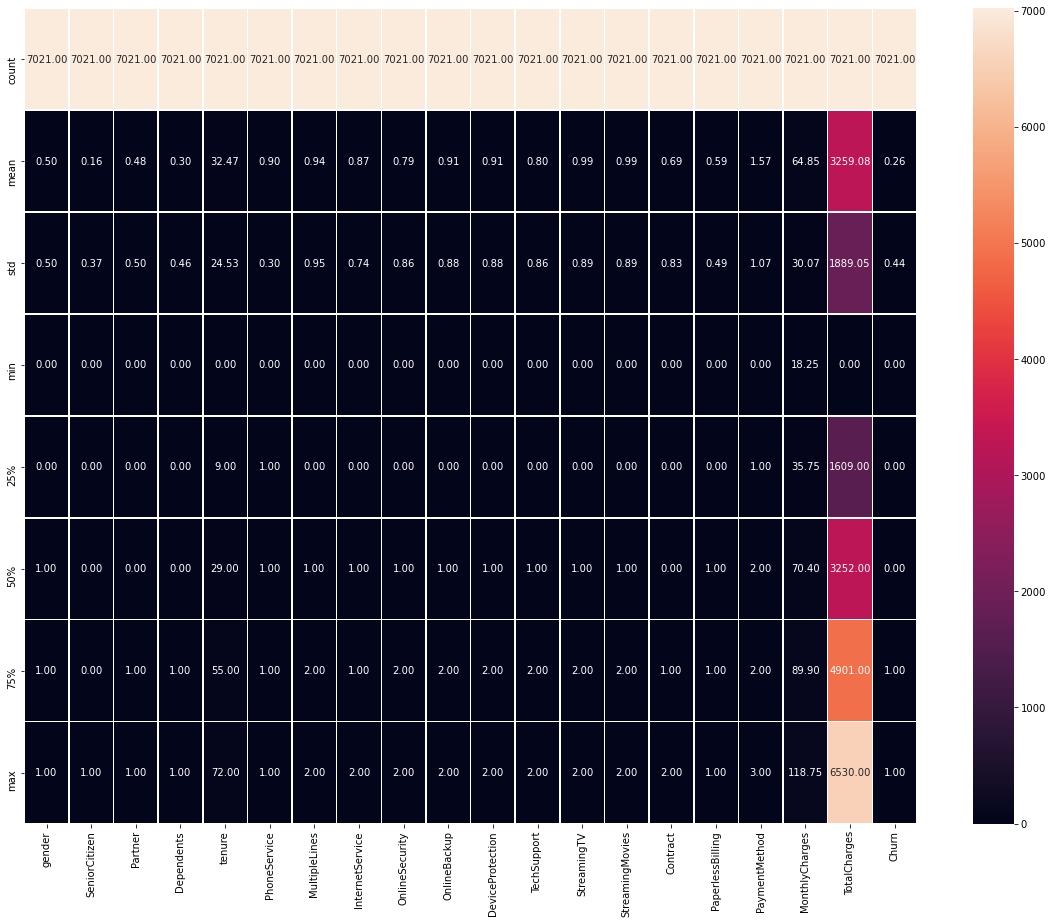

In [87]:
plt.figure(figsize=(20,15))
sns.heatmap(df.describe(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

### All the stats looks normal we can proceed further to check multicolinearity.

## Multicolinearity

<function matplotlib.pyplot.show(close=None, block=None)>

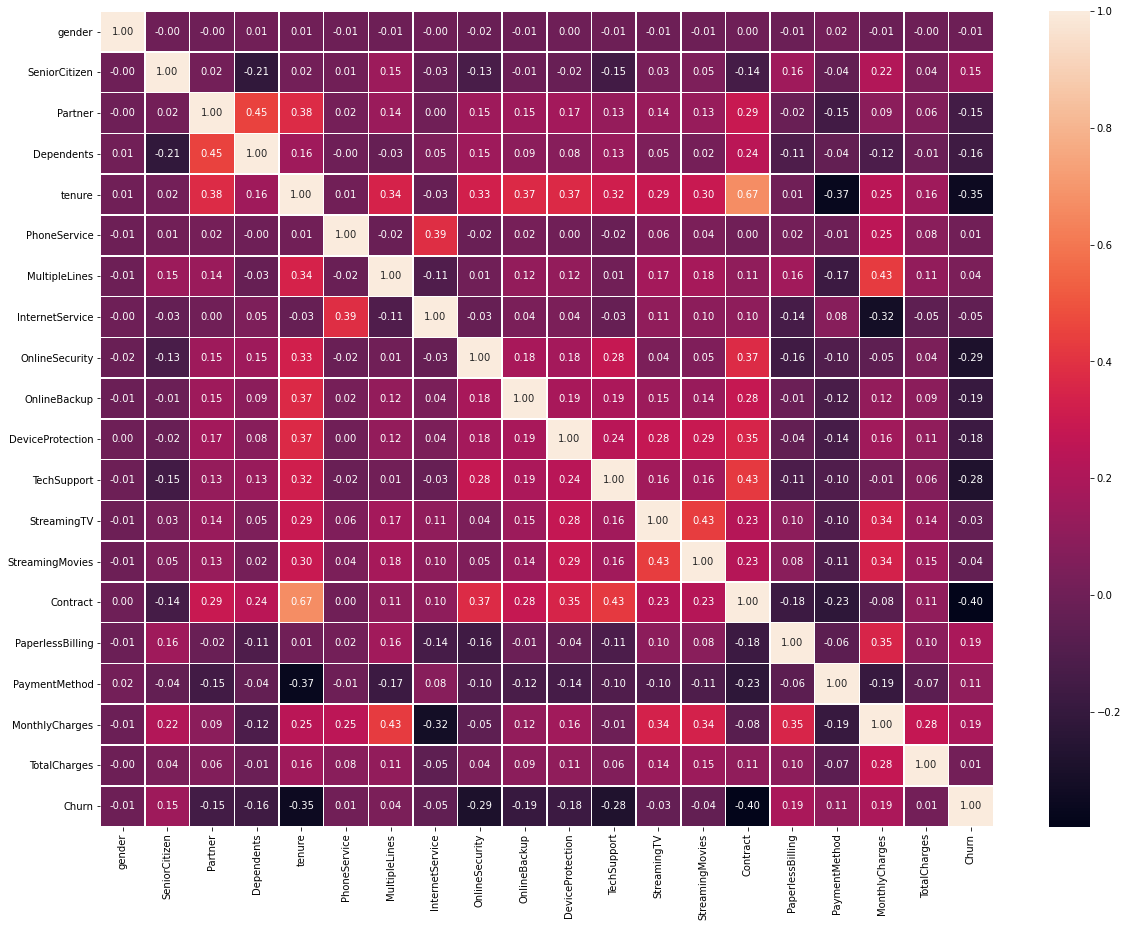

In [88]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

### No featues has multicollinearity with each other expect Contract and tenure which is more than 67% but This percentage is acceptable and no need to change anything in the dataset.So, I do not need to drop any feature. 

### The target has maximum trend with - Paperlessbilling and Monthly charge(19%)
### The target has minimum trend with - Phoneservice(1%)

### No feature has not strong trend with target expect. So, I will keep all feature for Model building.

### Checking the distribution

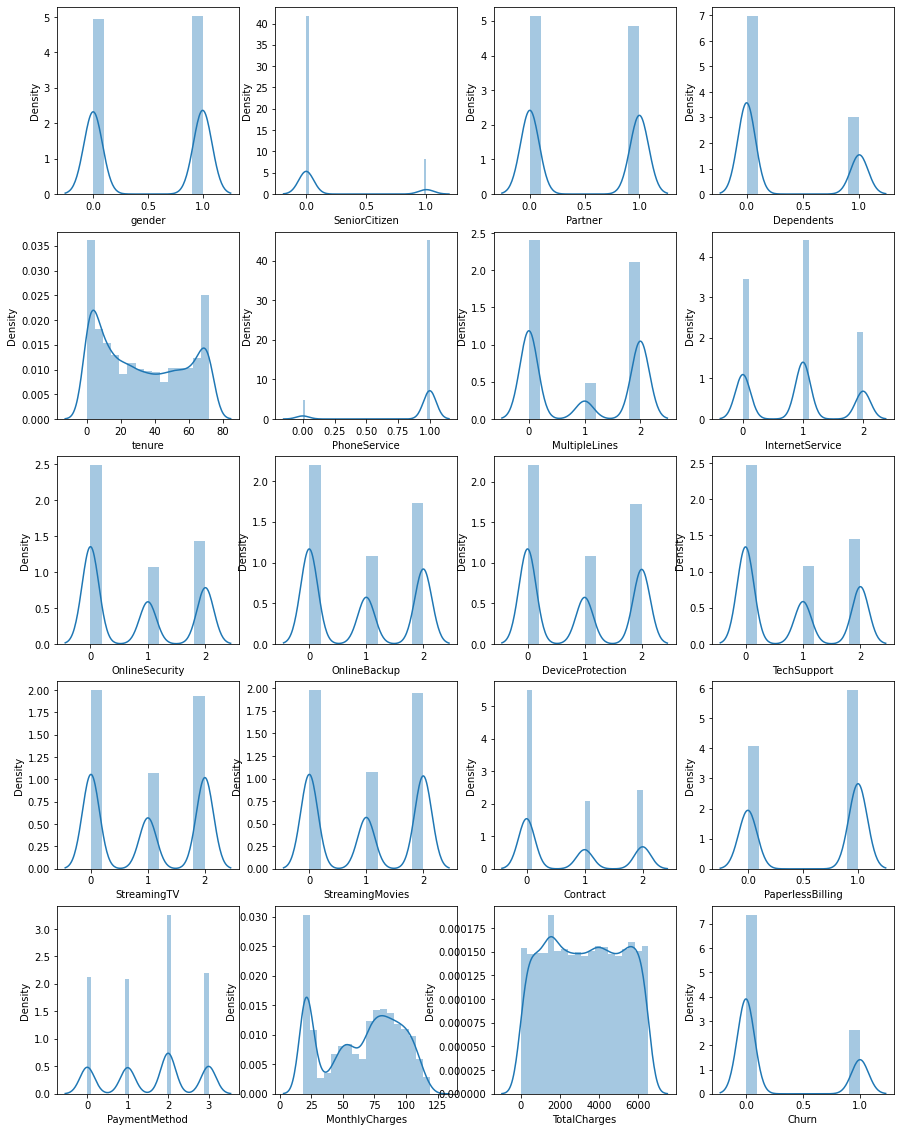

In [92]:
#### Plotting Distplot to check the distribution of the values
plt.figure(figsize=(15,20))
pn=1
for column in df:
    if pn <= 20:
        plt.subplot(5,4, pn)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

### All columns has categorical values expect Tenure which is has normal distribution, MonthlyCharges which is not normally distributrd and last is totalCharges which is normally distribution.

## Skewness

In [89]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
PhoneService       -2.721300
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.013866
Churn               1.068139
dtype: float64

### Only categorical column has some skeness which is acceptable. It will be exception and I do not need to deal with this. So, Let proceed further and check the outliers.

### Checking the Outlier of the dataset

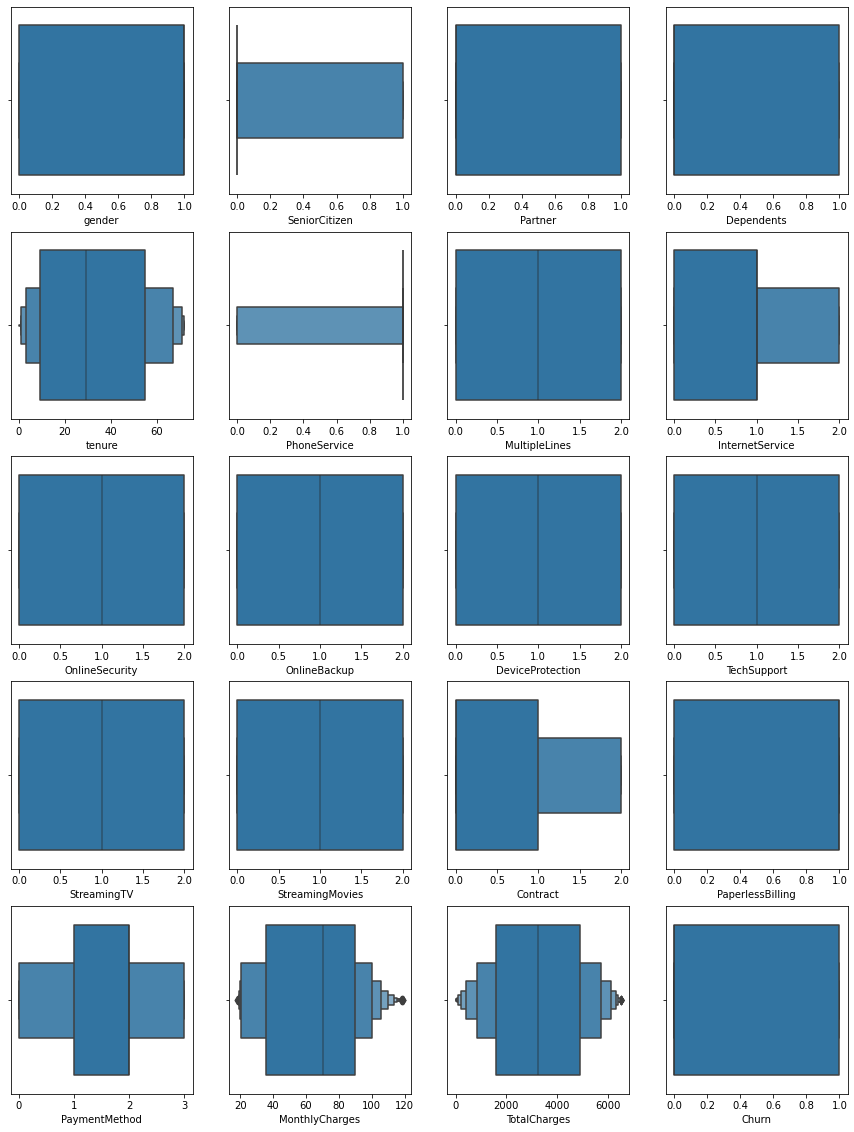

In [95]:
#### Plotting Boxplot to check the outliers
plt.figure(figsize=(15,20))
pn=1
for column in df:
    if pn <= 20:
        plt.subplot(5,4, pn)
        sns.boxenplot(df[column])
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

## No Column has the outliers. So, we can proceed further to build model.

### Splitting the features and moving toward to build model. 

In [96]:
x= df.drop(columns="Churn")
y=df["Churn"]

In [97]:
### Importing some preprocesing library for model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [98]:
### Scaling then feature with standard scaler 
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [99]:
#### Splitting the dataset into traing data and testing data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

5616 5616 1405 1405


In [100]:
### Importing the model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


 LogisticRegression Model Accuracy  
Accuracy_score for LogisticRegression model 80.5693950177936 
 Cross Validation score is  79.64672364672364 
 Classification report is  
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1029
           1       0.67      0.53      0.60       376

    accuracy                           0.81      1405
   macro avg       0.76      0.72      0.73      1405
weighted avg       0.80      0.81      0.80      1405
 
 Confusion Metrix is 
 [[956  73]
 [207 169]]


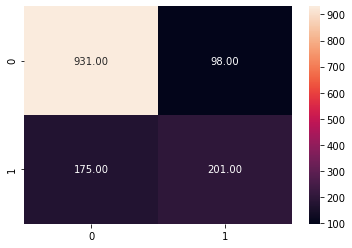

In [109]:
### Importing the LogisticRegression and checking the score and cross validation score 
lr= LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
acc_lr =accuracy_score(y_test,pred_lr)
scr = cross_val_score(lr, x,y, cv=5)
Clas_r = classification_report(y_test,pred_lr)
sns.heatmap(confusion_matrix(y_test,pred_lr), annot=True, fmt=".2f")
Corss_lr = scr.mean()

print("\n LogisticRegression Model Accuracy ",  '\nAccuracy_score for LogisticRegression model', acc_lr*100, "\n Cross Validation score is ",Corss_lr*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 RandomForestClassifier Model Accuracy 

Accuracy_score for RandomForestClassifier model 79.78647686832741 
 Cross Validation score is  79.02006468554511 
 Classification report is  
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1029
           1       0.67      0.53      0.60       376

    accuracy                           0.81      1405
   macro avg       0.76      0.72      0.73      1405
weighted avg       0.80      0.81      0.80      1405
 
 Confusion Metrix is 
 [[937  92]
 [192 184]]


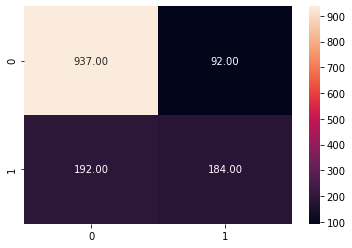

In [110]:
### Importing the RandomForestClassifier and  checking the score and cross validation score  
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
acc_RFC =accuracy_score(y_test,pred_RFC)
scr = cross_val_score(RFC, x_scaled,y, cv=5)
Corss_rfc = scr.mean()
sns.heatmap(confusion_matrix(y_test,pred_RFC), annot=True, fmt=".2f")
con = confusion_matrix(y_test,pred_RFC)

print("\n RandomForestClassifier Model Accuracy",  '\n\nAccuracy_score for RandomForestClassifier model', acc_RFC*100, "\n Cross Validation score is ",Corss_rfc*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 GaussianNB Model Accuracy 

Accuracy_score for GaussianNB model 74.80427046263345 
 Cross Validation score is  75.50200241303445 
 Classification report is  
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      1029
           1       0.52      0.75      0.61       376

    accuracy                           0.75      1405
   macro avg       0.71      0.75      0.71      1405
weighted avg       0.79      0.75      0.76      1405
 
 Confusion Metrix is 
 [[956  73]
 [207 169]]


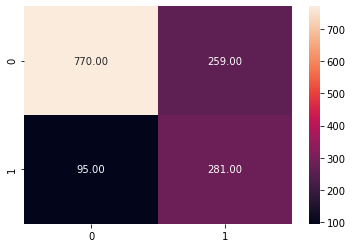

In [108]:
### Importing the GaussianNB and checking the score and cross validation score  
GB= GaussianNB()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
acc_GB =accuracy_score(y_test,pred_GB)
scr = cross_val_score(GB, x_scaled,y, cv=5)
Corss_GB = scr.mean()
Clas_r = classification_report(y_test,pred_GB)
sns.heatmap(confusion_matrix(y_test,pred_GB), annot=True, fmt=".2f")

print("\n GaussianNB Model Accuracy",  '\n\nAccuracy_score for GaussianNB model', acc_GB*100, "\n Cross Validation score is ",Corss_GB*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 GradientBoostingClassifier Model Accuracy 

Accuracy_score for GradientBoostingClassifier model 80.78291814946618 
 Cross Validation score is  80.14514706329653 
 Classification report is  
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1029
           1       0.67      0.53      0.60       376

    accuracy                           0.81      1405
   macro avg       0.76      0.72      0.73      1405
weighted avg       0.80      0.81      0.80      1405
 
 Confusion Metrix is 
 [[936  93]
 [177 199]]


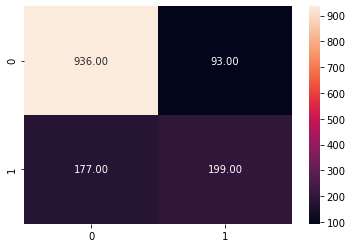

In [113]:
### Importing the GradientBoostingClassifier and checking the score and cross validation score
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
acc_gbc =accuracy_score(y_test,pred_gbc)
scr = cross_val_score(gbc, x,y, cv=5)
Corss = scr.mean()
sns.heatmap(confusion_matrix(y_test,pred_gbc), annot=True, fmt=".2f")
con = confusion_matrix(y_test,pred_gbc)
print("\n GradientBoostingClassifier Model Accuracy",  '\n\nAccuracy_score for GradientBoostingClassifier model', acc_gbc*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 SVC Model Accuracy 

Accuracy_score for SVC model 80.0711743772242 
 Cross Validation score is  73.55078018067343 
 Classification report is  
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1029
           1       0.70      0.45      0.55       376

    accuracy                           0.80      1405
   macro avg       0.76      0.69      0.71      1405
weighted avg       0.79      0.80      0.79      1405
 
 Confusion Metrix is 
 [[936  93]
 [177 199]]


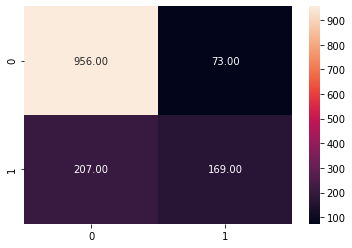

In [114]:
### Importing the SVC and checking the score and cross validation score
svc= SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
acc_svc =accuracy_score(y_test,pred_svc)
scr = cross_val_score(svc, x,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_svc)
sns.heatmap(confusion_matrix(y_test,pred_svc), annot=True, fmt=".2f")
print("\n SVC Model Accuracy",  '\n\nAccuracy_score for SVC model', acc_svc*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 KNeighborsClassifier Model Accuracy 

Accuracy_score for KNeighborsClassifier model 76.22775800711744 
 Cross Validation score is  75.20285711388914 
 Classification report is  
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1029
           1       0.56      0.49      0.53       376

    accuracy                           0.76      1405
   macro avg       0.69      0.68      0.68      1405
weighted avg       0.75      0.76      0.76      1405
 
 Confusion Metrix is 
 [[936  93]
 [177 199]]


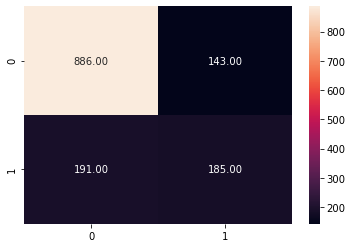

In [115]:
### Importing the KNeighborsClassifier and checking the score and cross validation score 
KNC= KNeighborsClassifier()
KNC.fit(x_train,y_train)
pred_KNC=KNC.predict(x_test)
acc_KNC =accuracy_score(y_test,pred_KNC)
scr = cross_val_score(KNC, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_KNC)
sns.heatmap(confusion_matrix(y_test,pred_KNC), annot=True, fmt=".2f")
print("\n KNeighborsClassifier Model Accuracy",  '\n\nAccuracy_score for KNeighborsClassifier model', acc_KNC*100, "\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)

### I performed 6 model prediction Accuracy score, those score are mentioned below - 

#### Accuracy score and cross validation score for LogisticRegression model 80.56  and cross validation score is 79.20
#### Accuracy score cross validation score for RandomForestClassifier model 79.78 and cross validation score is 79.02
#### Accuracy score cross validation score for GaussianNB model 74.80 and cross validation score is 75.50
#### Accuracy score cross validation score for KNeighborsClassifier model 76.22  and cross validation score is 75.20
#### Accuracy score cross validation score  for SVC model 80.07 and cross validation score is 73.55
#### Accuracy score cross validation score  for GradientBoostingClassifier model 80.78 and cross validation score is 80.14

### From the above, I conclude that I will go forward with GradientBoostingClassifier because the accuracy is good compariosn to other model and aslo has very low difference in Cross validation score but we can do better hyperparameter tuning with GradientBoostingClassifier and RandomForestClassifier. May the Accuracy will increase.


In [116]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
para = {'n_estimators':range(1,5),
       'criterion':["entropy", "gini"],
        'max_depth':range(1,6),
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,10)}
grid =  GridSearchCV(rfc, param_grid=para)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 6),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 5),
                         'n_estimators': range(1, 5)})

In [117]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 4}

In [135]:
### Importing the RandomForestRegressor and checking the score and r2 score
rr = RandomForestClassifier(criterion='entropy',max_depth= 20, min_samples_leaf= 15, min_samples_split=12,n_estimators=15)
rr.fit(x_train,y_train)
pred_rr=rr.predict(x_test)
acc_rr =accuracy_score(y_test,pred_rr)
scr = cross_val_score(rr, x,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_rr)
con = confusion_matrix(y_test,pred_rr)
print("\n RandomForestClassifier Model Accuracy",  '\n\nAccuracy_score for RandomForestClassifier model', acc_rr*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 RandomForestClassifier Model Accuracy 

Accuracy_score for RandomForestClassifier model 81.35231316725978 
 Cross Validation score is  79.81768409526417 
 Classification report is  
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1029
           1       0.72      0.50      0.59       376

    accuracy                           0.81      1405
   macro avg       0.78      0.71      0.73      1405
weighted avg       0.80      0.81      0.80      1405
 
 Confusion Metrix is 
 [[955  74]
 [188 188]]


In [127]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier()
para = {'n_estimators':range(1,5),
       'criterion':['friedman_mse', 'mse', 'mae'],
        'max_depth':range(1,5),
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,6)}
grid_s =  GridSearchCV(gb, param_grid=para)
grid_s.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 5),
                         'n_estimators': range(1, 5)})

In [136]:
grid_s.best_params_

{'criterion': 'mae',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 4}


 GradientBoostingClassifier Model Accuracy 

Accuracy_score for GradientBoostingClassifier model 78.22064056939502 
 Cross Validation score is  79.26211840090843 
 Classification report is  
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1029
           1       0.72      0.50      0.59       376

    accuracy                           0.81      1405
   macro avg       0.78      0.71      0.73      1405
weighted avg       0.80      0.81      0.80      1405
 
 Confusion Metrix is 
 [[967  62]
 [244 132]]


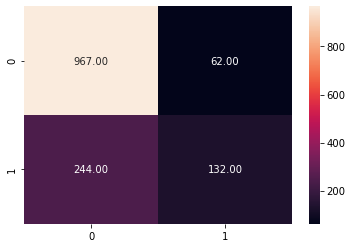

In [149]:
### Importing the RandomForestRegressor and checking the score and r2 score
gb = GradientBoostingClassifier(criterion='mae',max_depth= 10, min_samples_leaf= 10, min_samples_split=8,n_estimators=15)
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
acc_gb =accuracy_score(y_test,pred_gb)
scr = cross_val_score(gb, x,y, cv=5)
Corss = scr.mean()
sns.heatmap(confusion_matrix(y_test,pred_gb), annot=True, fmt=".2f")
con = confusion_matrix(y_test,pred_gb)
print("\n GradientBoostingClassifier Model Accuracy",  '\n\nAccuracy_score for GradientBoostingClassifier model', acc_gb*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)

### Conclusion- I got the increased accuracy but did not get better cross validation. So, I will keep GradientBoostingClassifier model

### Ploting the ROC

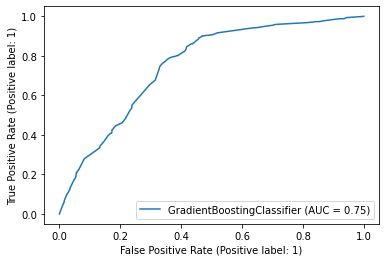

In [151]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gbc,x,y)
plt.show()

### The roc curve shows very good accuracy. 

### Saving the model

In [152]:
import joblib
joblib.dump(gbc, 'Telecom_customer_churn')

['Telecom_customer_churn']